In [1]:
import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import pandas as pd
from scipy import spatial

from utils import estimate_normals, normals_to_rgb
from plotting import set_axes_equal, set_defense_context, draw_unit_cube

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
def marsaglia(n_points, r=1.): 
    # Refs: Marsaglia, G., Ann. Math. Stat. 43:645-646, 1972
    assert r > 0, 'radius must be a positive number'
    a = np.random.uniform(-r, r, size=n_points)
    b = np.random.uniform(-r, r, size=n_points)

    mask = np.where(a ** 2 + b ** 2 < 1)
    a = a[mask]
    b = b[mask]

    x = 2 * a * np.sqrt(1 - a ** 2 - b ** 2)
    y = 2 * b * np.sqrt(1 - a ** 2 - b ** 2)
    z = 1 - 2 * (a ** 2 + b ** 2)
    return np.stack((x, y, z), axis=-1)

In [4]:
# generate random point cloud

r = 1
xyz = marsaglia(1000, r)

In [5]:
# create convex hull and extract the surface area

hull = spatial.ConvexHull(xyz)
A_hull = hull.area
print(f'A = {A_hull:.6f}')

A = 12.473003


In [6]:
# estimate normals

n = estimate_normals(xyz)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


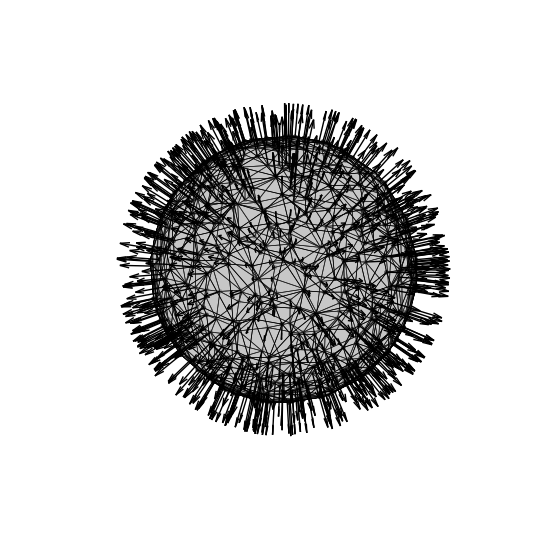

In [7]:
# visualize normals as arrows

with set_defense_context():
    fig = plt.figure(figsize=(3, 3))
    ax = plt.axes(projection ='3d')
    ax.scatter(*xyz.T, c='k', s=0.5)
    ax.quiver(*xyz.T, *n.T, color='k', length=0.25, lw=0.5)
    hull_triangle_coords = hull.points[hull.simplices]
    triangles = Poly3DCollection(hull_triangle_coords,
                                 ec='k', fc='gray', lw=0.25, alpha=0.25)
    ax.add_collection3d(triangles)
    ax.view_init(30, 60)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

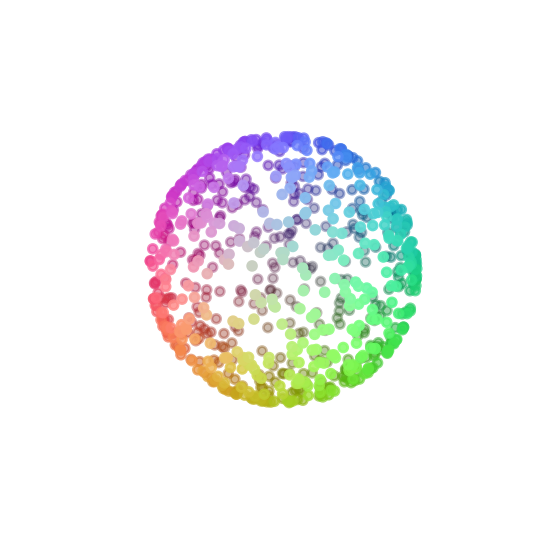

In [8]:
# convert arrows to rgb cube

c = normals_to_rgb(n)

with set_defense_context():
    fig = plt.figure(figsize=(3, 3))
    ax = plt.axes(projection ='3d')
    s = ax.scatter(*xyz.T, c=c, s=10)
    ax.view_init(30, 60)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()

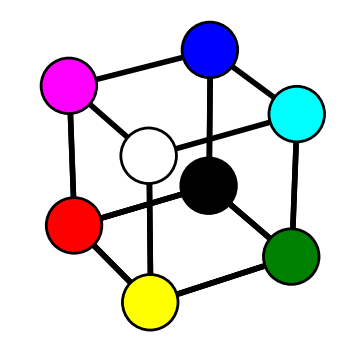

In [9]:
# rgb cube

pts = np.array(list(itertools.product([0, 1], repeat=3)))
cs = ['black', 'blue', 'green', 'cyan', 'red', 'magenta', 'yellow', 'white']
pairs = pd.DataFrame(data=pts, columns=['x', 'y', 'z'])
pairs['cs'] = cs

with set_defense_context():
    fig = plt.figure(figsize=(2, 2))
    ax = plt.axes(projection ='3d')
    ax = draw_unit_cube(ax)
    ax.scatter(*pts.T, c=cs, edgecolor='k', depthshade=False, s=400)
    ax.view_init(30, 60)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    fig.tight_layout()
    plt.show()